In [25]:
#import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [3]:
df=pd.read_csv('final_data.csv')

In [4]:
df.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,2,3,61,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,4,4,92,2,1,3,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,5,4,56,3,1,3,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,7,1,40,3,1,2,...,1,0,0,0,0,0,0,1,0,0


In [19]:
#put everything in feature vector X except 'Employeenumber"
X= df.loc[:,df.columns!='EmployeeNumber']

#reate target variable y from attrition column
y= df['Attrition_Yes']

In [20]:
#standarise the variables
scaler=StandardScaler()
scaler.fit(X,y)
scaler.transform(X,y)

array([[ 0.4463504 ,  0.74252653, -1.01090934, ..., -0.91892141,
         1.45864991,  1.59174553],
       [ 1.32236521, -1.2977746 , -0.14714972, ...,  1.08823234,
        -0.68556546, -0.62824112],
       [ 0.008343  ,  1.41436324, -0.88751511, ..., -0.91892141,
         1.45864991,  1.59174553],
       ...,
       [-1.08667552, -1.60518328, -0.64072665, ...,  1.08823234,
        -0.68556546,  1.59174553],
       [ 1.32236521,  0.54667746, -0.88751511, ...,  1.08823234,
        -0.68556546, -0.62824112],
       [-0.32016256, -0.43256792, -0.14714972, ...,  1.08823234,
        -0.68556546, -0.62824112]])

In [15]:
#split the data in train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [ ]:
#steps = [('scaler', StandardScaler())
#        ('model',RandomForestClassifier(n_estimators = 100)),
#      ]
#pipeline = Pipeline(steps)
# Fit the pipeline to the train set
#pipeline.fit(X_train,y_train)
# Predict the labels of the test set
#y_pred = pipeline.predict(X_test)
 
# Compute metrics
#print(classification_report(y_test,y_pred))

In [21]:
#build the classifier
model=RandomForestClassifier(n_estimators = 100)
model.fit(X_train,y_train)

#predict using model
y_pred=model.predict(X_test)

In [24]:
#evaluate the performance
score=accuracy_score(y_test, y_pred, normalize=True, sample_weight=None)
score

1.0

In [27]:
print(classification_report(y_test,y_pred, labels=[1, 2, 3]))

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        70
          2       0.00      0.00      0.00         0
          3       0.00      0.00      0.00         0

avg / total       1.00      1.00      1.00        70



c:\users\preeti saraswat\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
c:\users\preeti saraswat\appdata\local\programs\python\python35\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [28]:
#using cross validation and learning curve
from sklearn.model_selection import learning_curve
sizes, training_scores, testing_scores = learning_curve(RandomForestClassifier(n_estimators = 100), X, y, cv=10, scoring='accuracy', train_sizes=np.linspace(0.01, 1.0, 50))

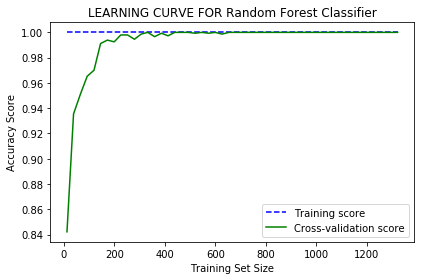

In [29]:
# Mean and Standard Deviation of training scores
mean_training = np.mean(training_scores, axis=1)
Standard_Deviation_training = np.std(training_scores, axis=1)
  
# Mean and Standard Deviation of testing scores
mean_testing = np.mean(testing_scores, axis=1)
Standard_Deviation_testing = np.std(testing_scores, axis=1)
  
# dotted blue line is for training scores and green line is for cross-validation score
plt.plot(sizes, mean_training, '--', color="b",  label="Training score")
plt.plot(sizes, mean_testing, color="g", label="Cross-validation score")
  
# Drawing plot
plt.title("LEARNING CURVE FOR Random Forest Classifier")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

From the curve, we can clearly see that as the size of the training set increases, the training score curve and the cross-validation score curve converge. The cross-validation accuracy increases as we add more training data. So adding training data is useful in this case. Since the training score is very accurate, this indicates low bias and high variance. So this model also begins overfitting the data because the cross-validation score is relatively lower and increases very slowly as the size of the training set increases.

